Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

# Strojno učenje

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

# Bilježnica 7: Logistička regresija

(c) 2015 Jan Šnajder

<i>Verzija: 0.2 (2015-11-16)</i>

In [2]:
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Sadržaj:

* Model logističke regresije

* Gubitak unakrsne entropije

* Minimizacija pogreške

* Poveznica s generativnim modelom

* Usporedba linearnih modela

* Sažetak


# Model logističke regresije

### Podsjetnik: poopćeni linearni modeli

$$
h(\mathbf{x}) = \color{red}{f\big(}\mathbf{w}^\intercal\tilde{\mathbf{x}}\color{red}{\big)}
$$


* $f : \mathbb{R}\to[0,1]$ ili $f : \mathbb{R}\to[-1,+1]$ je **aktivacijska funkcija**


* Linearna granica u ulaznom prostoru (premda je $f$ nelinearna)
  * Međutim, ako preslikavamo s $\boldsymbol\phi(\mathbf{x})$ u prostor značajki, granica u ulaznom prostoru može biti nelinearna


* Model nelinearan u parametrima (jer je $f$ nelinearna)
  * Komplicira optimizaciju (nema rješenja u zatvorenoj formi)

### Podsjetnik: klasifikacija regresijom

* Model:
$$
    h(\mathbf{x}) = \mathbf{w}^\intercal\boldsymbol{\phi}(\mathbf{x}) \qquad (f(\alpha)=\alpha)
$$


* [Skica]


* Funkcija gubitka: kvadratni gubitak


* Optimizacijski postupak: izračun pseudoinverza (rješenje u zatvorenoj formi)


* Prednosti:
  * Uvijek dobivamo rješenje
  

* Nedostatci:
  * Nerobusnost: ispravno klasificirani primjeri utječu na granicu $\Rightarrow$ pogrešna klasifikacija čak i kod linearno odvojivih problema
  * Izlaz modela nije probabilistički
  
### Podsjetnik: perceptron

* Model:
$$
h(\mathbf{x}) = f\big(\mathbf{w}^\intercal\boldsymbol\phi(\mathbf{x})\big)
\qquad f(\alpha) = \begin{cases}
+1 & \text{ako $\alpha\geq0$}\\
-1 & \text{inače}
\end{cases}
$$


* [Skica]


* Funkcija gubitka: količina pogrešne klasifikacije 
$$
\mathrm{max}(0,-\tilde{\mathbf{w}}^\intercal\boldsymbol{\phi}(\mathbf{x})y)
$$


* Optimizacijski postupak: gradijentni spust


* Prednosti:
  * Ispravno klasificirani primjeri ne utječu na granicu<br>
    $\Rightarrow$ ispravna klasifikacija linearno odvojivih problema


* Nedostatci:
  * Aktivacijska funkcija nije derivabilna<br>
    $\Rightarrow$ funkcija gubitka nije derivabilna<br>
    $\Rightarrow$ gradijent funkcije pogreške nije nula u točki minimuma<br>
    $\Rightarrow$ postupak ne konvergira ako primjeri nisu linearno odvojivi
  * Decizijska granica ovisi o početnom izboru težina
  * Izlaz modela nije probabilistički

### Logistička regresija

* Ideja: upotrijebiti aktivacijsku funkciju s izlazima $[0,1]$ ali koja jest derivabilna


* **Logistička (sigmoidalna) funkcija**:
$$
    \sigma(\alpha) = \frac{1}{1 + \exp(-\alpha)}
$$

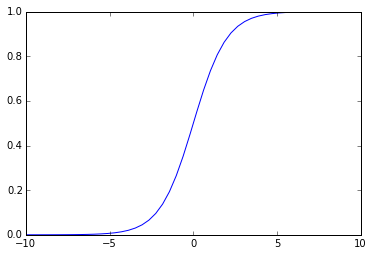

In [4]:
def sigm(x): return 1 / (1 + sp.exp(-x))

xs = sp.linspace(-10, 10)
plt.plot(xs, sigm(xs));

* Nagib sigmoide može se regulirati množenjem ulaza određenim faktorom:

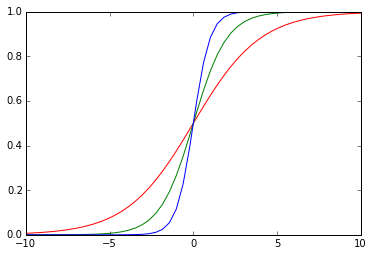

In [6]:
plt.plot(xs, sigm(0.5*xs), 'r');
plt.plot(xs, sigm(xs), 'g');
plt.plot(xs, sigm(2*xs), 'b');

* Derivacija sigmoidalne funkcije:
    
$$
\frac{\partial\sigma(\alpha)}{\partial\alpha} = 
\frac{\partial}{\partial\alpha}\big(1 + \exp(-\alpha)\big) =
\sigma(\alpha)\big(1 - \sigma(\alpha)\big)
$$

* Model **logističke regresije**:
$$
    h(\mathbf{x}|\mathbf{w}) = \sigma\big(\mathbf{w}^\intercal\boldsymbol{\phi}(\mathbf{x})\big) =
    \frac{1}{1+\exp(-\mathbf{w}^\intercal\boldsymbol{\phi}(\mathbf{x}))}
$$


* **NB:** Logistička regresija je klasifikacijski model (unatoč nazivu)!

### Probabilistički izlaz

* $h(\mathbf{x})\in[0,1]$, pa $h(\mathbf{x})$ možemo tumačiti kao **vjerojatnost** da primjer pripada klasi $\mathcal{C}_1$ (klasi za koju $y=1$):

$$
h(\mathbf{x}|\mathbf{w}) =  \sigma\big(\mathbf{w}^\intercal\mathbf{\phi}(\mathbf{x})\big) = \color{red}{P(y=1|\mathbf{x})}
$$

* Vidjet ćemo kasnije da postoji i dublje opravdanje za takvu interpretaciju


# Funkcija logističkog gubitka


* Definirali smo model, trebamo još definirati **funkciju gubitka** i **optimizacijski postupak**


* Logistička funkcija koristi **gubitak unakrsne entropije**


### Definicija


* Funkcija pokriva dva slučajeva (kada je oznaka primjera $y=1$ i kada je $y=0$):

$$
L(h(\mathbf{x}),y) =
\begin{cases}
- \ln h(\mathbf{x}) & \text{ako $y=1$}\\
- \ln \big(1-h(\mathbf{x})\big) & \text{ako $y=0$}
\end{cases}
$$


* Ovo možemo napisati sažetije:
$$
L(h(\mathbf{x}),y) =  
- y \ln h(\mathbf{x}) - (1-y)\ln \big(1-h(\mathbf{x})\big)
$$



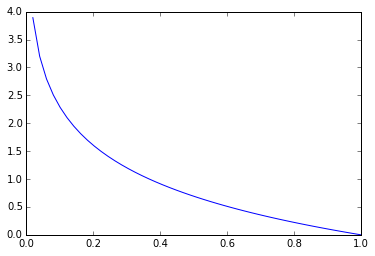

In [3]:
xs = linspace(0, 1)
plt.plot(xs, -sp.log(xs));

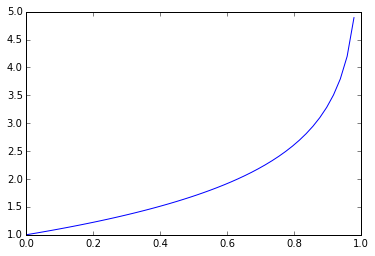

In [4]:
plt.plot(xs, 1 - sp.log(1 - xs));

* Ako $y=1$, funkcija kažnjava model to više što je njegov izlaz manji od jedinice. Slično, ako $y=0$, funkcija kažnjava model to više što je njegov izlaz veći od nule


* Intutivno se ovakva funkcija čini u redu, ali je pitanje kako smo do nje došli

### Izvod

* Funkciju gubitka izvest ćemo iz **funkcije pogreške**
  * Podsjetnik: funkcija pogreške = očekivanje funkcije gubitka
        

* Budući da logistička regresija daje vjerojatnosti oznaka za svaki primjer, možemo izračunati kolika je vjerojatnost označenog skupa primjera $\mathcal{D}$ pod našim modelom, odnosno kolika je izglednost parametra $\mathbf{w}$ modela


* Želimo da ta izglednost bude što veća, pa ćemo funkciju pogreške definirati kao **negativnu log-izglednost** parametara $\mathbf{w}$:
$$
E(\mathbf{w}|\mathcal{D}) = -\ln\mathcal{L}(\mathbf{w}|\mathcal{D})
$$


* Želimo maksimizirati log-izglednost, tj. minimizirati ovu pogrešku


* Log-izglednost:
$$
\begin{align*}
\ln\mathcal{L}(\mathbf{w}|\mathcal{D})
&= \ln p(\mathcal{D}|\mathbf{w})
= \ln\prod_{i=1}^N p(\mathbf{x}^{(i)}, y^{(i)}|\mathbf{w})\\
&= \ln\prod_{i=1}^N P(y^{(i)}|\mathbf{x}^{(i)},\mathbf{w})p(\mathbf{x}^{(i)})\\
&= \sum_{i=1}^N \ln P(y^{(i)}|\mathbf{x}^{(i)},\mathbf{w}) + \underbrace{\color{gray}{\sum_{i=1}^N \ln p(\mathbf{x}^{(i)})}}_{\text{ne ovisi o $\mathbf{w}$}}
\end{align*}
$$


* $y^{(i)}$ je oznaka $i$-tog primjera koja može biti 0 ili 1 $\Rightarrow$ **Bernoullijeva varijabla**


* Budući da $y^{(i)}$ Bernoullijeva varijabla, njezina distribucija je:
$$
P(y^{(i)}) = \mu^{y^{(i)}}(1-\mu)^{y^{(i)}}
$$
gdje je $\mu$ vjerojatnost da $y^{(i)}=1$


* Naš model upravo daje vjerojatnost da primjer $\mathcal{x}^{(i)}$ ima oznaku $y^{(i)}=1$, tj.:
$$
\mu = P(y^{(i)}=1|\mathbf{x}^{(i)},\mathbf{w}) = \color{red}{h(\mathbf{x}^{(i)} | \mathbf{w})}
$$


* To znači da vjerojatnost oznake $y^{(i)}$ za dani primjer $\mathbf{x}^{i}$ možemo napisati kao:

$$
P(y^{(i)}|\mathbf{x}^{(i)},\mathbf{w}) = 
\color{red}{h(\mathbf{x}^{(i)}|\mathbf{w})}^{y^{(i)}}\big(1-\color{red}{h(\mathbf{x}^{(i)}|\mathbf{w})}\big)^{1-y^{(i)}}
$$


* Nastavljamo s izvodom log-izglednosti:

$$
\begin{align*}
\ln\mathcal{L}(\mathbf{w}|\mathcal{D}) 
&= \sum_{i=1}^N \ln P(y^{(i)}|\mathbf{x}^{(i)},\mathbf{w}) \color{gray}{+ \text{konst.}}\\
&\Rightarrow \sum_{i=1}^N\ln \Big(h(\mathbf{x}^{(i)}|\mathbf{w})^{y^{(i)}}\big(1-h(\mathbf{x}^{(i)}|\mathbf{w})\big)^{1-y^{(i)}}\Big) \\
& = \sum_{i=1}^N \Big(y^{(i)} \ln h(\mathbf{x}^{(i)}|\mathbf{w})+ (1-y^{(i)})\ln\big(1-h(\mathbf{x}^{(i)}|\mathbf{w})\big)\Big)
\end{align*}
$$


* Empirijsku pogrešku definiramo kao negativnu log-izglednost (do na konstantu):

$$
E(\mathbf{w}|\mathcal{D}) = \sum_{i=1}^N \Big(-y^{(i)} \ln h(\mathbf{x}^{(i)}|\mathbf{w}) - (1-y^{(i)})\ln \big(1-h(\mathbf{x}^{(i)}|\mathbf{w})\big)\Big)
$$

* Alternativno (kako ne bi ovisila o broju primjera):

$$
E(\mathbf{w}|\mathcal{D}) = \color{red}{\frac{1}{N}} \sum_{i=1}^N\Big( - y^{(i)} \ln h(\mathbf{x}^{(i)}|\mathbf{w})- (1-y^{(i)})\ln \big(1-h(\mathbf{x}^{(i)}|\mathbf{w})\big)\Big)
$$

$\Rightarrow$ **pogreška unakrsne entropije** (engl. *cross-entropy error*)


* Iz pogreške možemo iščitati funkciju gubitka:

$$
L(h(\mathbf{x}),y) = - y \ln h(\mathbf{x}) - (1-y)\ln \big(1-h(\mathbf{x})\big)
$$

$\Rightarrow$ **gubitak unakrsne entropije** (engl. *cross-entropy loss*)


* **NB:** Izraz kompaktno definira grananje za dva slučaja (za $y=1$ i za $y=0$)

In [14]:
def cross_entropy_loss(h_x, y):
    return -y * sp.log(h_x) - (1 - y) * sp.log(1 - h_x)

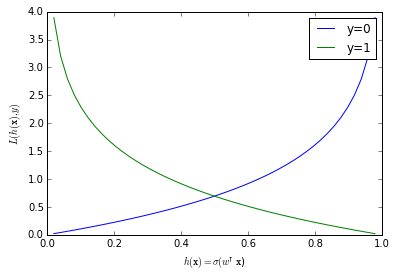

In [24]:
xs = linspace(0, 1)
plt.plot(xs, cross_entropy_loss(xs, 0), label='y=0')
plt.plot(xs, cross_entropy_loss(xs, 1), label='y=1')
plt.ylabel('$L(h(\mathbf{x}),y)$')
plt.xlabel('$h(\mathbf{x}) = \sigma(w^\intercal\mathbf{x}$)')
plt.legend()
plt.show()

* **Q:** Koliki je gubitak na primjeru $\mathbf{x}$ za koji model daje $h(\mathbf{x})=P(y=1|\mathbf{x})=0.7$, ako je stvarna oznaka primjera $y=0$? Koliki je gubitak ako je stvarna oznaka $y=1$?


* Gubitaka nema jedino onda kada je primjer savršeno točno klasificiran ($h(x)=1$ za $y=1$ odnosno $h(x)=0$ za $y=0$)


* U svim drugim slučajevima postoji gubitak: čak i ako je primjer ispravno klasificiran (na ispravnoj strani granice) postoji malen gubitak, ovisno o pouzdanosti klasifikacije


* Ipak, primjeri na ispravnoj strani granice ($h(\mathbf{x})\geq 0.5$ za $y=1$ odnosno $h(\mathbf{x})< 0.5$ za $y=0$) nanose puno manji gubitak od primjera na pogrešnoj strani granice

In [26]:
#TODO: konkretan primjer u ravnini

# Minimizacija pogreške

$$
\begin{align*}
E(\mathbf{w}) &=
\sum_{i=1}^N L\big(h(\mathbf{x}^{(i)}|\mathbf{w}),y^{(i)}\big)\\
L(h(\mathbf{x}),y) &= - y \ln h(\mathbf{x}) - (1-y)\ln \big(1-h(\mathbf{x})\big)\\
h(\mathbf{x}) &= \sigma(\mathbf{w}^\intercal\mathbf{x}) = \frac{1}{1 + \exp(-\mathbf{w}^\intercal\mathbf{x})}
\end{align*}
$$


* Ne postoji rješenje u zatvorenoj formi (zbog nelinearnosti funkcije $\sigma$)


* Minimiziramo **gradijentnim spustom**:
$$ 
\nabla E(\mathbf{w}) =
\sum_{i=1}^N \nabla L\big(h(\mathbf{x}^{(i)}|\mathbf{w}),y^{(i)}\big)
$$

* Prisjetimo se:
$$
\frac{\partial\sigma(\alpha)}{\partial\alpha} = 
\sigma(\alpha)\big(1 - \sigma(\alpha)\big)
$$

* Dobivamo: 
$$
\nabla L\big(h(\mathbf{x}),y\big) = 
\Big(-\frac{y}{h(\mathbf{x})} + \frac{1-y}{1-h(\mathbf{x})}\Big)h(\mathbf{x})\big(1-h(\mathbf{x})\big)
\tilde{\mathbf{x}} = \big(h(\mathbf{x})-y\big)\tilde{\mathbf{x}}
$$


* Gradijent-vektor pogreške:
$$
    \nabla E(\mathbf{w}) = \sum_{i=1}^N \big(h(\mathbf{x}^{(i)})-y^{(i)}\big)\tilde{\mathbf{x}}^{(i)}
$$





#### Gradijentni spust (*batch*)

> $\mathbf{w} \gets (0,0,\dots,0)$<br>
> **ponavljaj** do konvergencije<br>
> $\quad \Delta\mathbf{w} \gets (0,0,\dots,0)$<br>
> $\quad$ **za** $i=1,\dots, N$<br>
> $\qquad h \gets \sigma(\mathbf{w}^\intercal\tilde{\mathbf{x}}^{(i)})$<br>
> $\qquad \Delta \mathbf{w} \gets \Delta\mathbf{w} + (h-y^{(i)})\, \tilde{\mathbf{x}}^{(i)}$<br>
> $\quad \mathbf{w} \gets \mathbf{w} - \eta \Delta\mathbf{w} $

#### Stohastički gradijentni spust (*on-line*)

> $\mathbf{w} \gets (0,0,\dots,0)$<br>
> **ponavljaj** do konvergencije<br>
> $\quad$ (slučajno permutiraj primjere u $\mathcal{D}$)<br>
> $\quad$ **za** $i=1,\dots, N$<br>
> $\qquad$ $h \gets \sigma(\mathbf{w}^\intercal\tilde{\mathbf{x}}^{(i)})$<br>
> $\qquad$ $\mathbf{w} \gets \mathbf{w} - \eta (h-y^{(i)})\tilde{\mathbf{x}}^{(i)}$


In [ ]:
#TODO kod + primjer

### Regularizacija

* Regularizacija sprečava (smanjuje mogućnost) prenaučenosti
  
  
* Trostruki učinak:
  * **(1)** Ako je model nelinearan, regularizacijom sprečavamo prenaučenost
  * **(2)** Ako imamo puno značajki, regularizacijom efektivno smanjujemo broj značajki jer težine potiskujemo prema nuli
  * **(3) Specifično za logističku regresiju:** Ako je problem linearno odvojiv, sprječavamo "otvrdnjivanje" sigmoide
    * $\|\mathbf{w}\|$ raste $\Rightarrow$ $\mathbf{w}\tilde{\mathbf{x}}$ raste $\Rightarrow$ sigmoida je strmija


* [Skica za (1)]


* [Skica za (3)]


* L2-regularizacija:

$$
\begin{align*}
E(\mathbf{w}|\mathcal{D}) = \sum_{i=1}^N \Big( - y^{(i)} \ln h(\mathbf{x}^{(i)}) - (1-y^{(i)})\ln
\big(1-h(\mathbf{x}^{i})\big)\Big)
+ \color{red}{\frac{\lambda}{2}\mathbf{w}^\intercal\mathbf{w}}
\end{align*}
$$

* Korekcija težina:
$$
\mathbf{w} \gets \mathbf{w} - \eta\Big(
\sum_{i=1}^N\big(h(\mathbf{x}^{(i)}) - y^{(i)}\big)\mathbf{x}^{(i)} + \color{red}{\lambda \mathbf{w}}\Big) 
$$

* Ekvivalentno:
$$
    \mathbf{w} \gets \mathbf{w}(1\color{red}{-\eta\lambda}) - \eta
\sum_{i=1}^N\big(h(\mathbf{x}^{(i)}) - y^{(i)}\big)\mathbf{x}^{(i)}
$$
gdje $\mathbf{w}(1-\eta\lambda)$ uzrokuje **prigušenje težina** (engl. *weight decay*)


* **NB:** Težinu $w_0$ ne regulariziramo!
  * Ako bismo regularizirali težinu $w_0$, ona bi $w_0\to 0$. Kako $w_0$ određuje udaljenost ravnine od ishodišta (ta udaljenost je $-w_0|\|\mathbf{w}\|$, v. prethodnu bilježnicu), to znači da bi ravnina uvijek morala prolaziti kroz ishodište i da ne bismo mogli dobro razdvojiti dvije klase u slučajevima kada granica ne prolazi baš kroz ishodište (a općenito granica ne mora prolaziti kroz ishodište).


#### L2-regularizirana logistička regresija (gradijentni spust, *batch*)

> $\mathbf{w} \gets (0,0,\dots,0)$<br>
> **ponavljaj** do konvergencije<br>
> $\quad \color{red}{\Delta w_0 \gets 0}$<br>
> $\quad \Delta\mathbf{w} \gets (0,0,\dots,0)$<br>
> $\quad$ **za** $i=1,\dots, N$<br>
> $\qquad h \gets \sigma(\mathbf{w}^\intercal\tilde{\mathbf{x}}^{(i)})$<br>
> $\qquad \color{red}{\Delta w_0 \gets \Delta w_0 + h-y^{(i)}}$<br>
> $\qquad \Delta\mathbf{w} \gets \Delta\mathbf{w} + (h-y^{(i)})\mathbf{x}^{(i)}$<br>
> $\quad \color{red}{w_0 \gets w_0 - \eta \Delta w_0}$<br>
> $\quad \mathbf{w} \gets \mathbf{w}(1\color{red}{-\eta\lambda}) - \eta \Delta\mathbf{w}$


#### L2-regularizirana logistička regresija (stohastički gradijentni spust, *on-line*)

> $\mathbf{w} \gets (0,0,\dots,0)$<br>
> **ponavljaj** do konvergencije:<br>
> $\quad$ (slučajno permutiraj primjere u $\mathcal{D}$)<br>
> $\quad$ za $i=1,\dots, N$<br>
> $\qquad h \gets \sigma(\mathbf{w}^\intercal\mathbf{x}^{(i)})$<br>
> $\qquad \color{red}{w_0 \gets w_0 - \eta  (h-y^{(i)})}$<br>
> $\qquad \mathbf{w} \gets \mathbf{w}(1\color{red}{-\eta\lambda}) - \eta (h-y^{(i)})\mathbf{x}^{(i)}$<br>


# Poveznica s generativnim modelom

TODO

# Usporedba linearnih modela

TODO

# Sažetak

* Logistička regresija je **diskriminativan klasifikacijski model** s probabilističkim izlazom
  
  
* Koristi se **logistička funkcija gubitka** odnosno **pogreška unakrsne entropije**


* Optimizacija se provodi **gradijentnim spustom**, a prenaučenost se može spriječiti **regularizacijom**


* Model **odgovara generativnom modelu** s normalno distribuiranim izglednostima i dijeljenom kovarijacijskom matricom, ali je broj parametara logističke regresije manji 


* Logistička regresija vrlo je dobar algoritam koji **nema        nedostatke** koje imaju klasifikacija regresijom i perceptron
